In [18]:
import numpy as np
import pandas as pd
from clustering.kmesa import KMESA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('./datasets/Country-data.csv')
print(df.head())

print(f'\nNumber of samples: {df.shape[0]}')

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  

Number of samples: 167


In [6]:
features = df.columns[1:]
n_features = len(features)

print(f'Number of features: {n_features}\n')

print('----- Features -----')
for feature in features:
    print(feature)

Number of features: 9

----- Features -----
child_mort
exports
health
imports
income
inflation
life_expec
total_fer
gdpp


In [10]:
X = df[features]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[0])

[0.42648491 0.04948197 0.35860783 0.25776487 0.00804721 0.12614361
 0.47534517 0.73659306 0.00307343]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
colors = ['red', 'green', 'blue', 'gold', 'purple', 'brown', 'cyan', 'm', 'teal', 'orange',
          'darkslateblue', 'lightcoral', 'firebrick', 'plum', 'forestgreen', 'pink', 'darkgray']
methods = ['random', 'max', 'min', 'cluster_own', 'cluster_other', 'cluster_mean',
           'centroid_split', 'centroid_gather', 'maxmin', 'carousel']

k_means_history = {
    'k_clusters': [],
    'labels': [],
    'sil_score': [],
    'sse': []
}
kmesa_history = {
    'k_clusters': [],
    'labels': [],
    'sil_score': [],
    'sse': []
}

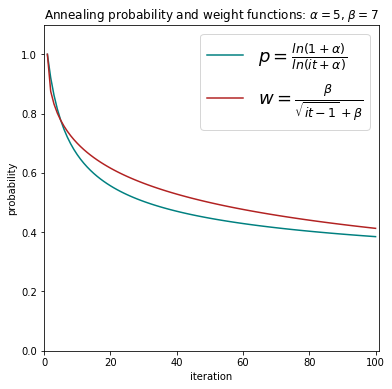

In [16]:
est_temp = KMESA(annealing_prob_function='log',
                 alpha=5,
                 annealing_weight_function='sqrt',
                 beta=7)
est_temp.plot_annealing_functions(n_iter=100)

In [17]:
k_clusters_list = range(2, 11)
for k_clusters in k_clusters_list:
    est_k_means = KMeans(n_clusters=k_clusters, max_iter=400)
    est_k_means.fit(X_scaled)

    k_means_history['k_clusters'].append(k_clusters)
    k_means_history['labels'].append(est_k_means.labels_)
    k_means_history['sil_score'].append(silhouette_score(X_scaled, est_k_means.labels_))
    k_means_history['sse'].append(est_k_means.inertia_)

    kmesa_method_history = {
        'labels': [],
        'sse': []
    }

    for method in methods:
        est_kmesa = KMESA(k_clusters=k_clusters,
                          n_init=3,
                          max_iter=400,
                          annealing_method=method,
                          annealing_prob_function='log',
                          alpha=5,
                          annealing_weight_function='sqrt',
                          beta=7,
                          )
        est_kmesa.fit(X_scaled)

        kmesa_method_history['labels'].append(est_kmesa.labels_)
        kmesa_method_history['sse'].append(est_kmesa.inertia_)

    kmesa_best_index = np.argmin(kmesa_method_history['sse'])
    kmesa_labels = kmesa_method_history['labels'][kmesa_best_index]
    kmesa_sse = kmesa_method_history['sse'][kmesa_best_index]
    kmesa_sil_score = silhouette_score(X_scaled, kmesa_labels)

    kmesa_history['k_clusters'].append(k_clusters)
    kmesa_history['labels'].append(kmesa_labels)
    kmesa_history['sil_score'].append(kmesa_sil_score)
    kmesa_history['sse'].append(kmesa_sse)

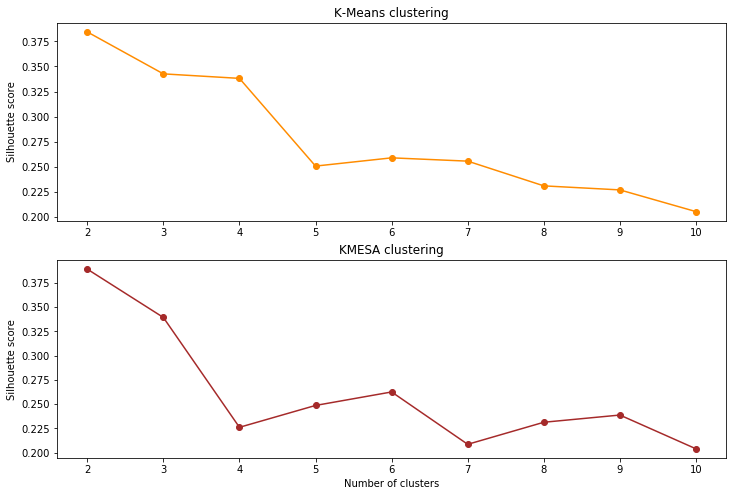

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
axes[0].plot(k_clusters_list, k_means_history['sil_score'],
             c='darkorange', marker='o', label='Silhouette score')
axes[0].set_title('K-Means clustering')
axes[0].set_ylabel('Silhouette score')

axes[1].plot(k_clusters_list, kmesa_history['sil_score'],
             c='brown', marker='o', label='Silhouette score')
axes[1].set_title('KMESA clustering')
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Silhouette score')

fig.savefig('Countries_scoring')

In [27]:
k_means_best_index = np.argmax(k_means_history['sil_score'])
kmesa_best_index = np.argmax(kmesa_history['sil_score'])

print('----- K-Means best score -----')
print(f'    * Number of clusters: {k_means_history["k_clusters"][k_means_best_index]}')
print(f'    * Silhouette score: {k_means_history["sil_score"][k_means_best_index] : .4}')
print(f'    * SSE: {k_means_history["sse"][k_means_best_index] : .4}')
print()

print('----- KMESA best score -----')
print(f'    * Number of clusters: {kmesa_history["k_clusters"][kmesa_best_index]}')
print(f'    * Silhouette score: {kmesa_history["sil_score"][kmesa_best_index] : .4}')
print(f'    * SSE: {kmesa_history["sse"][kmesa_best_index] : .4}')

----- K-Means best score -----
    * Number of clusters: 2
    * Silhouette score:  0.3845
    * SSE:  25.94

----- KMESA best score -----
    * Number of clusters: 2
    * Silhouette score:  0.3891
    * SSE:  58.36
